In [1]:
import pandas as pd
from vega import VegaLite

In [2]:
data_dir = "../results"

In [119]:
def load_data ():
    path = "01-May-2019-run-for-yd.csv"
    path = "01-May-2019-more-sizes-all.csv"
    df   = pd.read_csv(f"{data_dir}/{path}")
    return df

In [120]:
df = load_data()

df = df.drop(columns="epochs")
# Average over the seed.
df = df.groupby(["method", "size"]).mean().reset_index()
df = df.drop(columns="seed")
df

,method,size,ft_acc,ft_epoch_acc
0,argmax,1,0.287143,0.278571
1,argmax,3,0.608571,0.608571
2,argmax,5,0.690000,0.661429
3,argmax,50,0.842857,0.831429
4,argmax,100,0.898571,0.895714
5,argmax,300,0.918571,0.914286
6,argmax,600,0.942857,0.941429
7,sampling,1,0.278571,0.271429
8,sampling,3,0.432857,0.425714
9,sampling,5,0.560000,0.558571


In [121]:
def view_graph (df):
    ticks = list(map(int, sorted(set(df["size"].values))))

    g = VegaLite({
          "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
          "width": 700, "height": 400,
          "layer": 
            [
              # Fine-Tuning
              { "mark": { "type": "line", "interpolate": "basis" },
                "encoding": {
                "x":       {"field": "size",   "type": "nominal",
                            "axis": { "values": ticks, "labelAngle": 0, "title": "Training set size" }},
                "y":       {"field": "ft_epoch_acc"
                           , "type": "quantitative"
                           , "axis": {"title": "Accuracy"}
                           , "scale": { "domain": [0.0, 1] }},
                "color":   {"field": "method", "type": "nominal", "legend": { "title": "Method"}}
                }
              },
#              # Last-Layer Only
#              { "mark": { "type": "line", "interpolate": None, "strokeDash": [4, 4] },
#                "encoding": {
#                "x":       {"field": "size",   "type": "nominal",
#                            "axis": { "values": ticks, "labelAngle": 0 }},
#                "y":       {"field": "sp_epoch_acc"
#                           , "type": "quantitative"
#                           , "scale": { "domain": [0.0, 1] }},
#                "color":   {"field": "method", "type": "nominal"}
#                }      
#              }
          ]

        }, df)
    return g


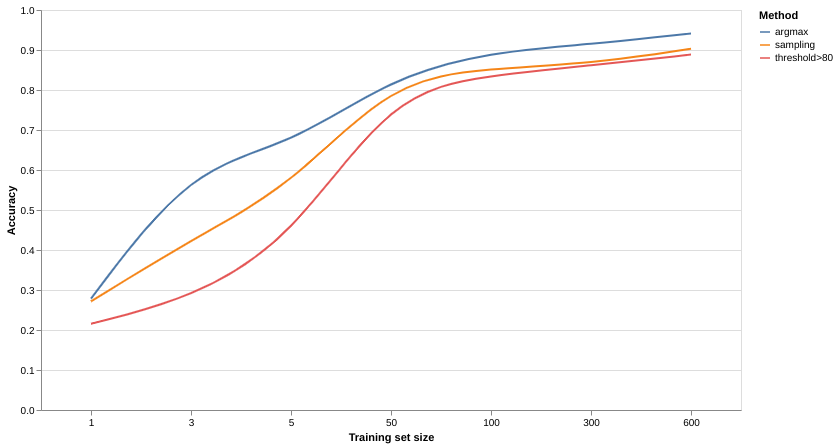

In [122]:
view_graph(df)